bt - Flexible Backtesting for Python

http://pmorissette.github.io/bt/

In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import bt
import matplotlib
import csv
import glob
import os
import sys
import xlrd
import gzip
import altair 
matplotlib.style.use('ggplot')


In [2]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
data.head()

https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1262293200&period2=1504428777&interval=1d&events=history&crumb=jSq5yMZUp9w
https://query1.finance.yahoo.com/v7/finance/download/AGG?period1=1262293200&period2=1504428778&interval=1d&events=history&crumb=jSq5yMZUp9w


,spy,agg
Date,,
2010-01-04,97.314606,83.732468
2010-01-05,97.572205,84.113434
2010-01-06,97.640915,84.064774
2010-01-07,98.053070,83.967514
2010-01-08,98.379379,84.016144


In [3]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [4]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

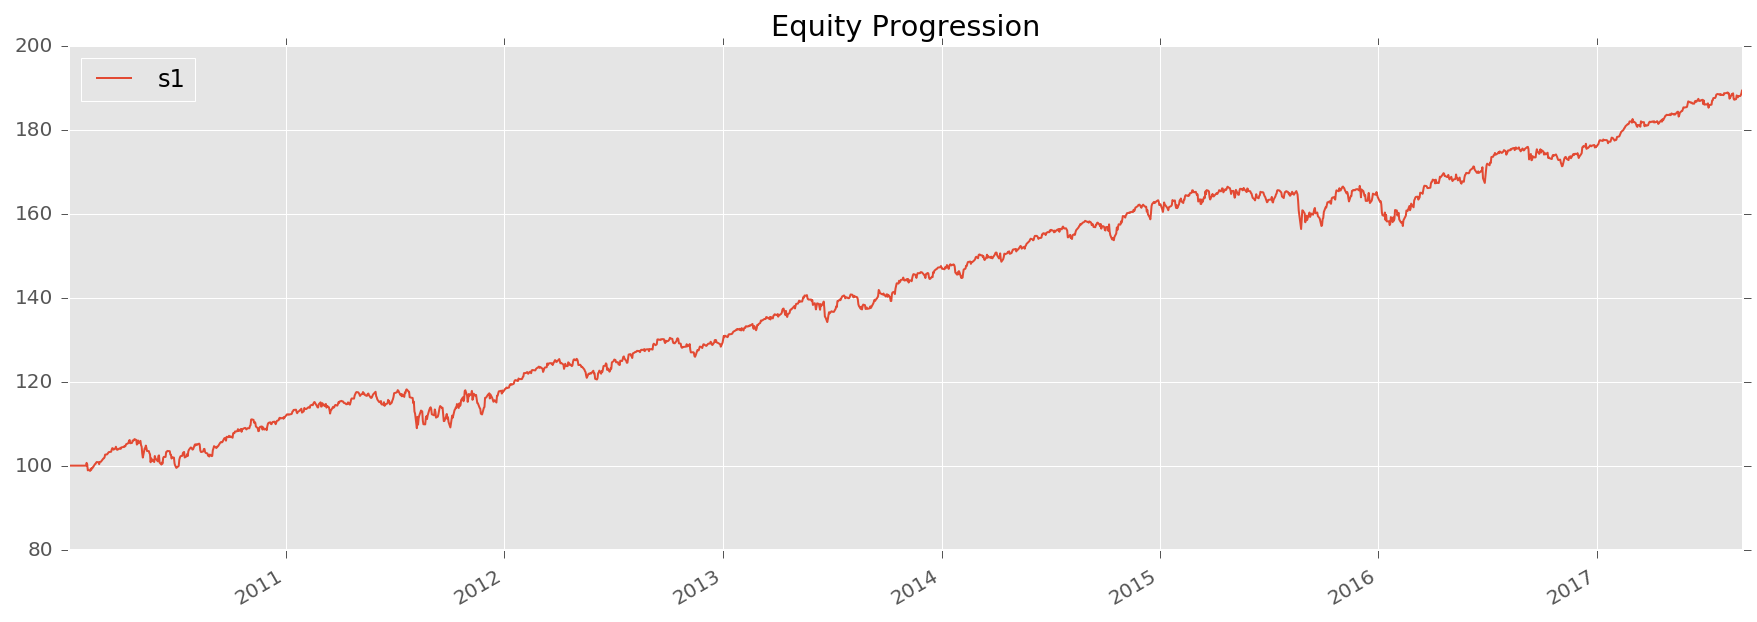

In [5]:
# first let's see an equity curve
res.plot()

In [6]:
res.display()


Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2017-09-01
Risk-free rate       0.00%

Total Return         89.30%
Daily Sharpe         1.22
Daily Sortino        1.59
CAGR                 8.69%
Max Drawdown         -7.83%
Calmar Ratio         1.11

MTD                  -0.04%
3m                   1.71%
6m                   3.71%
YTD                  7.65%
1Y                   8.09%
3Y (ann.)            6.21%
5Y (ann.)            8.21%
10Y (ann.)           8.69%
Since Incep. (ann.)  8.69%

Daily Sharpe         1.22
Daily Sortino        1.59
Daily Mean (ann.)    8.58%
Daily Vol (ann.)     7.04%
Daily Skew           -0.36
Daily Kurt           4.06
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.45
Monthly Sortino      2.55
Monthly Mean (ann.)  8.52%
Monthly Vol (ann.)   5.89%
Monthly Skew         0.02
Monthly Kurt         0.39
Best Month           5.70%
Worst Month          -3.39%

Yearly Sharpe   

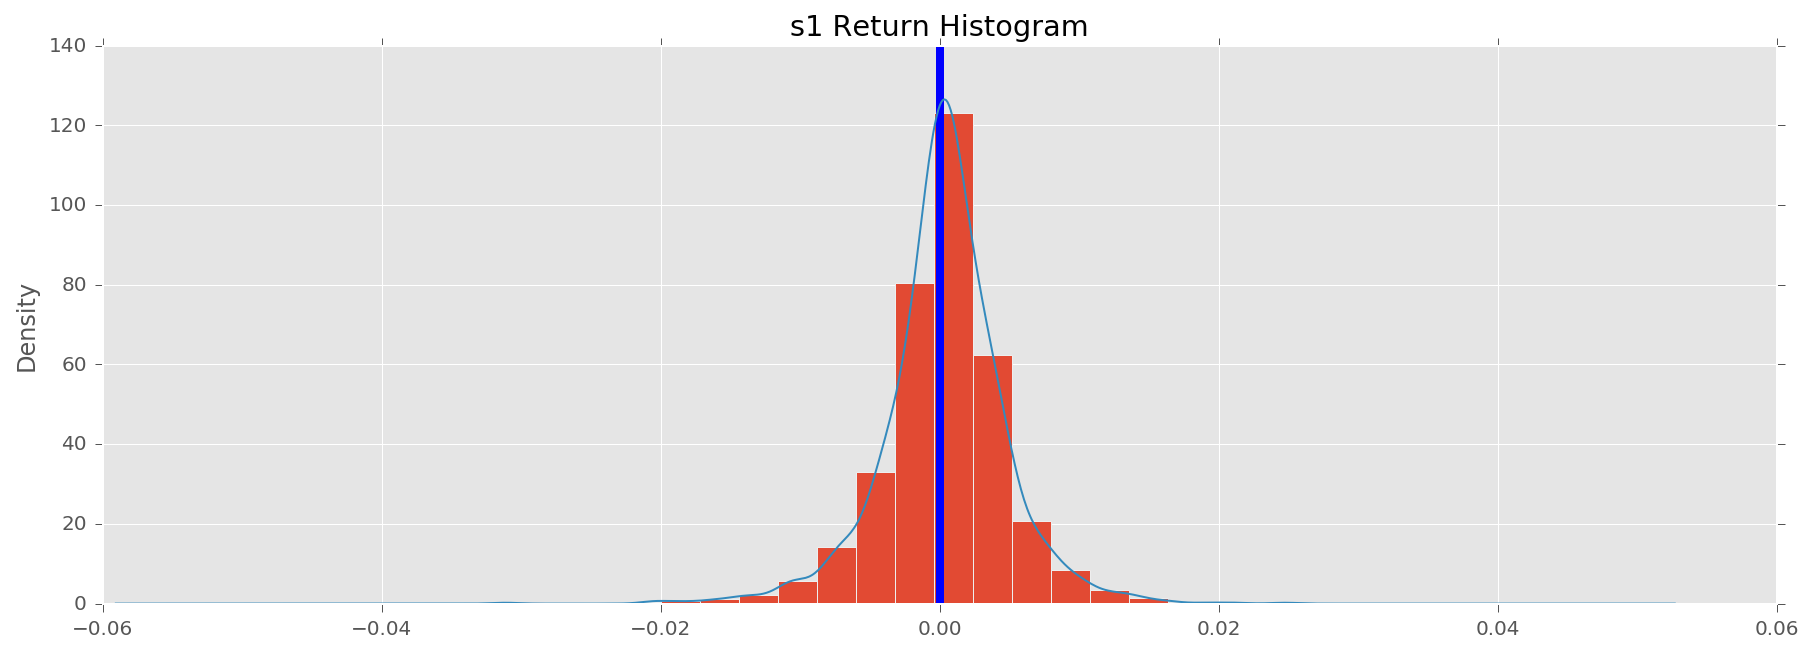

In [7]:
res.plot_histogram()

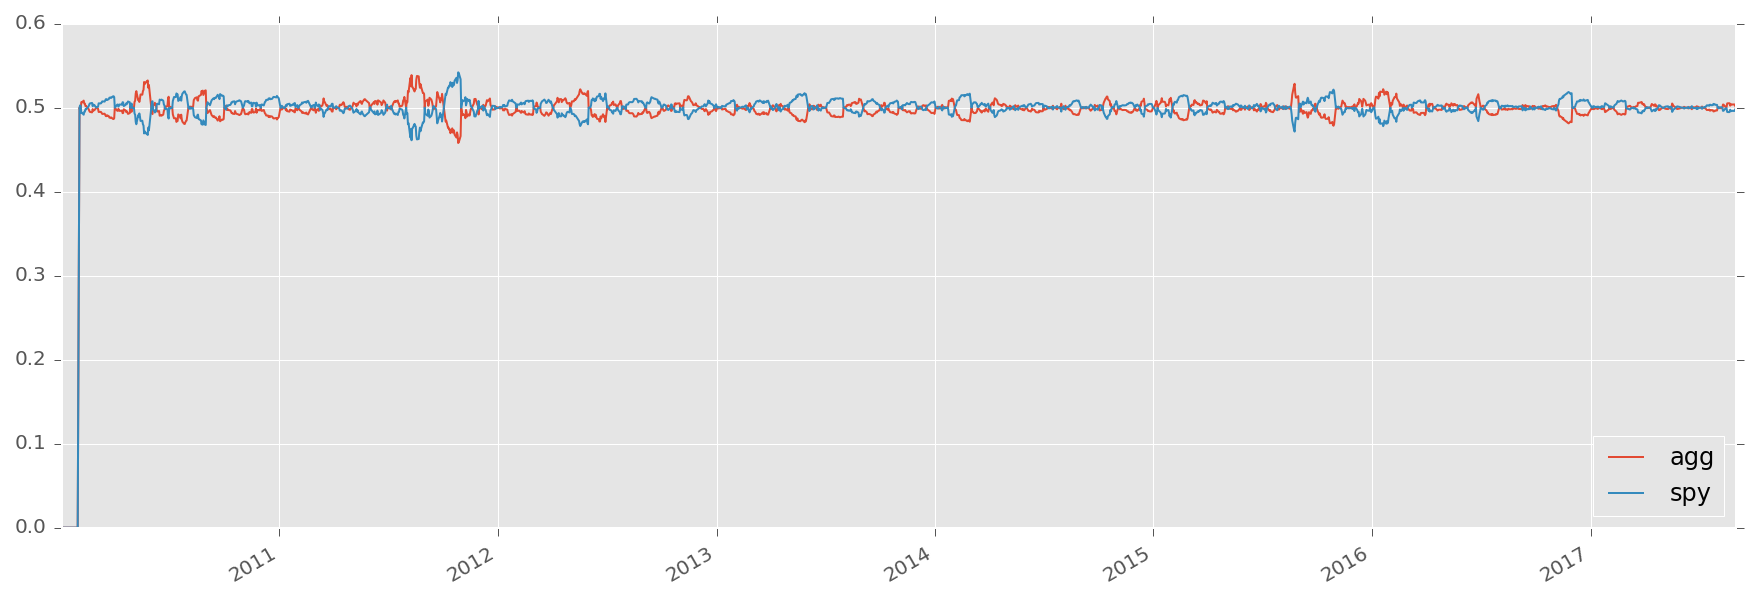

In [8]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

s2
0% [############################# ] 100% | ETA: 00:00:00

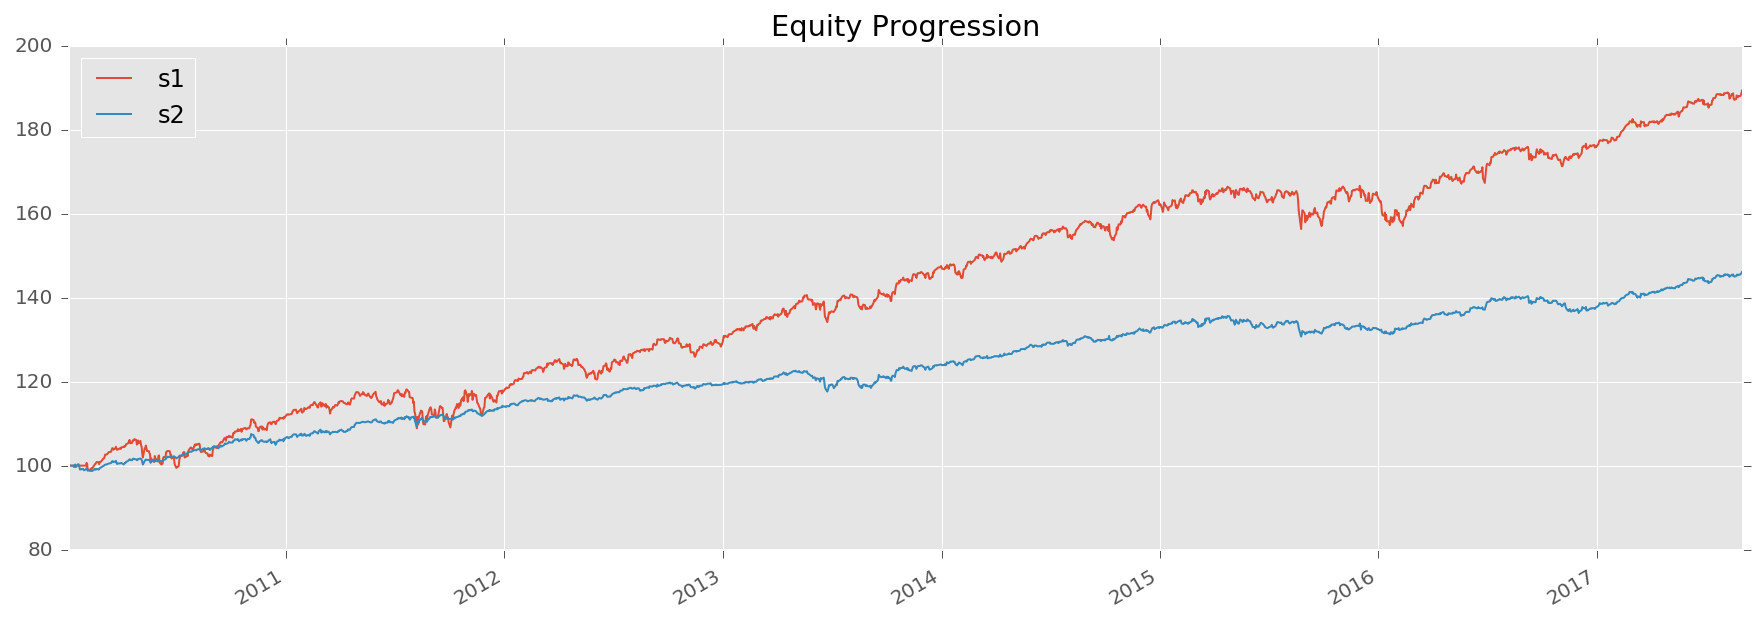

In [9]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [10]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2017-09-01  2017-09-01
Risk-free rate       0.00%       0.00%

Total Return         89.30%      46.00%
Daily Sharpe         1.22        1.51
Daily Sortino        1.59        2.10
CAGR                 8.69%       5.06%
Max Drawdown         -7.83%      -4.07%
Calmar Ratio         1.11        1.25

MTD                  -0.04%      -0.14%
3m                   1.71%       1.40%
6m                   3.71%       3.27%
YTD                  7.65%       6.06%
1Y                   8.09%       4.28%
3Y (ann.)            6.21%       3.81%
5Y (ann.)            8.21%       4.21%
10Y (ann.)           8.69%       5.06%
Since Incep. (ann.)  8.69%       5.06%

Daily Sharpe         1.22        1.51
Daily Sortino        1.59        2.10
Daily Mean (ann.)    8.58%       4.99%
Daily Vol (ann.)     7.04%       3.30%
Daily Skew           -0.36       -0.29
Daily Kurt  

In [11]:
# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                    ['spy', 'eem'])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other is a Strategy.
master = bt.Strategy('master', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [mom_s, 'agg'])

# create the backtest and run it
t = bt.Backtest(master, data)
r = bt.run(t)

master
0% [############################# ] 100% | ETA: 00:00:00

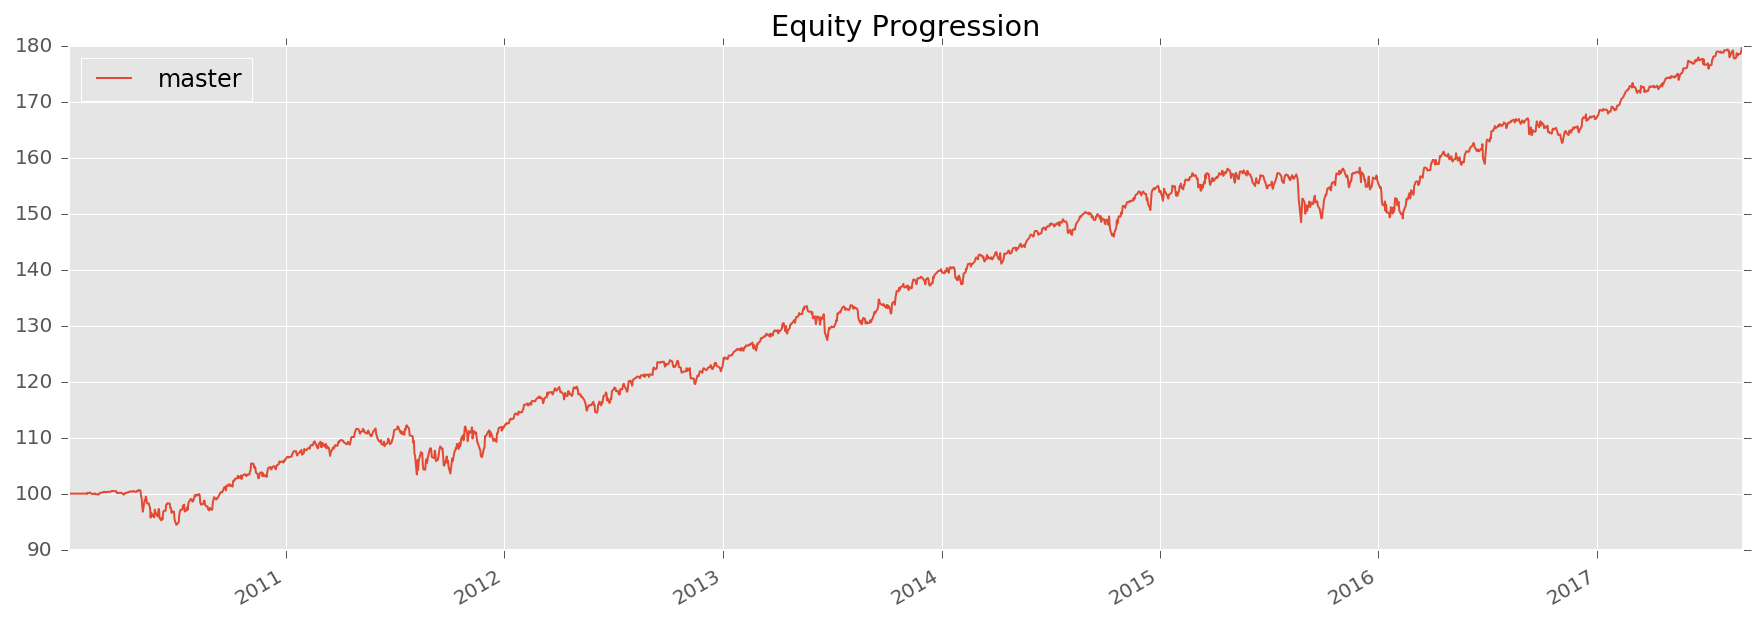

In [12]:
r.plot()

*****


SMA Strategy
http://pmorissette.github.io/bt/examples.html#sma-strategy


*****

In [13]:
import bt

In [14]:
data = bt.get('aapl,msft,c,gs,ge', start ='2010-01-01')

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262293200&period2=1504428789&interval=1d&events=history&crumb=jSq5yMZUp9w
https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1262293200&period2=1504428789&interval=1d&events=history&crumb=jSq5yMZUp9w
https://query1.finance.yahoo.com/v7/finance/download/C?period1=1262293200&period2=1504428790&interval=1d&events=history&crumb=jSq5yMZUp9w
https://query1.finance.yahoo.com/v7/finance/download/GS?period1=1262293200&period2=1504428791&interval=1d&events=history&crumb=jSq5yMZUp9w
https://query1.finance.yahoo.com/v7/finance/download/GE?period1=1262293200&period2=1504428791&interval=1d&events=history&crumb=jSq5yMZUp9w


In [15]:
import pandas as pd 

In [16]:
sma=data.rolling(50).mean()

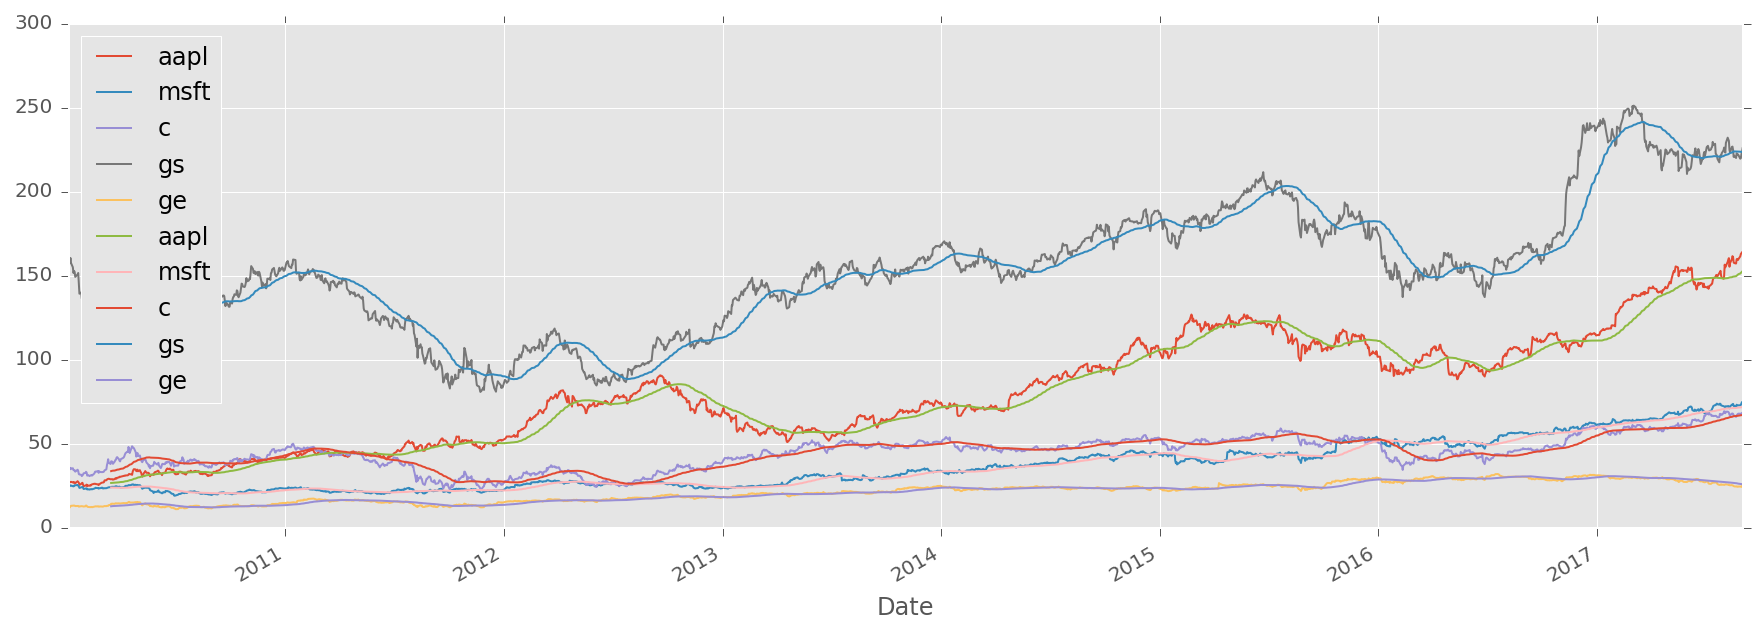

In [17]:
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [19]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [20]:
# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)

above50sma
0% [######                        ] 100% | ETA: 00:00:00

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0% [############################# ] 100% | ETA: 00:00:00

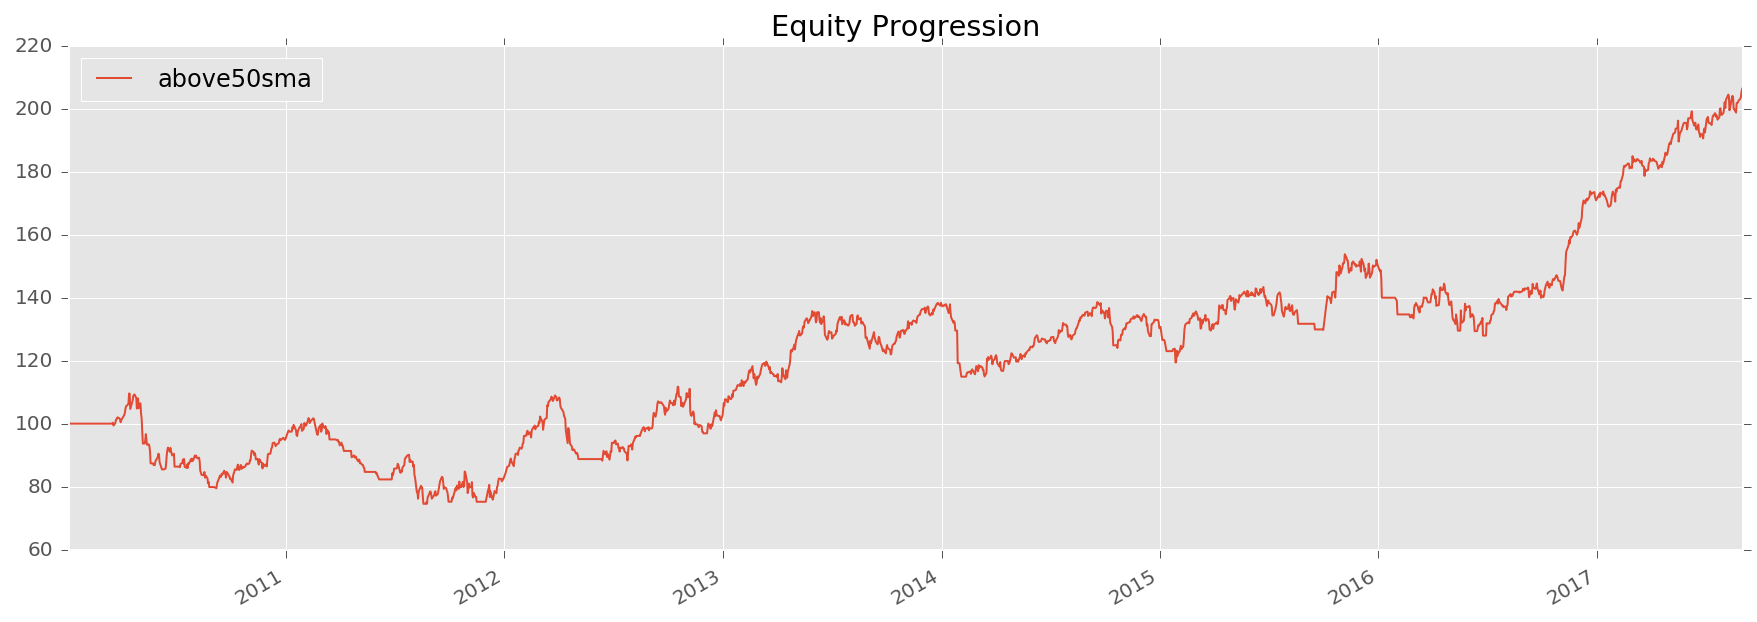

In [21]:
res.plot()

In [22]:
res.display()

Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2017-09-01
Risk-free rate       0.00%

Total Return         106.57%
Daily Sharpe         0.62
Daily Sortino        0.76
CAGR                 9.93%
Max Drawdown         -31.97%
Calmar Ratio         0.31

MTD                  0.17%
3m                   6.26%
6m                   11.71%
YTD                  20.87%
1Y                   45.16%
3Y (ann.)            15.08%
5Y (ann.)            16.00%
10Y (ann.)           9.93%
Since Incep. (ann.)  9.93%

Daily Sharpe         0.62
Daily Sortino        0.76
Daily Mean (ann.)    11.05%
Daily Vol (ann.)     17.77%
Daily Skew           -0.55
Daily Kurt           4.63
Best Day             5.78%
Worst Day            -7.99%

Monthly Sharpe       0.57
Monthly Sortino      0.78
Monthly Mean (ann.)  11.55%
Monthly Vol (ann.)   20.20%
Monthly Skew         -0.55
Monthly Kurt         0.73
Best Month           13.64%
Worst Month          -1

In [23]:
def above_sma(tickers, sma_per=50, start='2010-01-01', name='above_sma'):
    """
    Long securities that are above their n period
    Simple Moving Averages with equal weights.
    """
    # download data
    data = bt.get(tickers, start=start)
    # calc sma
    sma = data.rolling(sma_per).mean()

    # create strategy
    s = bt.Strategy(name, [SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

    # now we create the backtest
    return bt.Backtest(s, data)

In [24]:
# simple backtest to test long-only allocation
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

# create the backtests
tickers = 'aapl,msft,c,gs,ge'
sma10 = above_sma(tickers, sma_per=10, name='sma10')
sma20 = above_sma(tickers, sma_per=20, name='sma20')
sma40 = above_sma(tickers, sma_per=40, name='sma40')
benchmark = long_only_ew('spy', name='spy')

# run all the backtests!
res2 = bt.run(sma10, sma20, sma40, benchmark)

sma10
0% [#####                         ] 100% | ETA: 00:00:01

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0% [############################# ] 100% | ETA: 00:00:00sma20
0% [############################# ] 100% | ETA: 00:00:00sma40
0% [############################# ] 100% | ETA: 00:00:00spy
0% [############################# ] 100% | ETA: 00:00:00

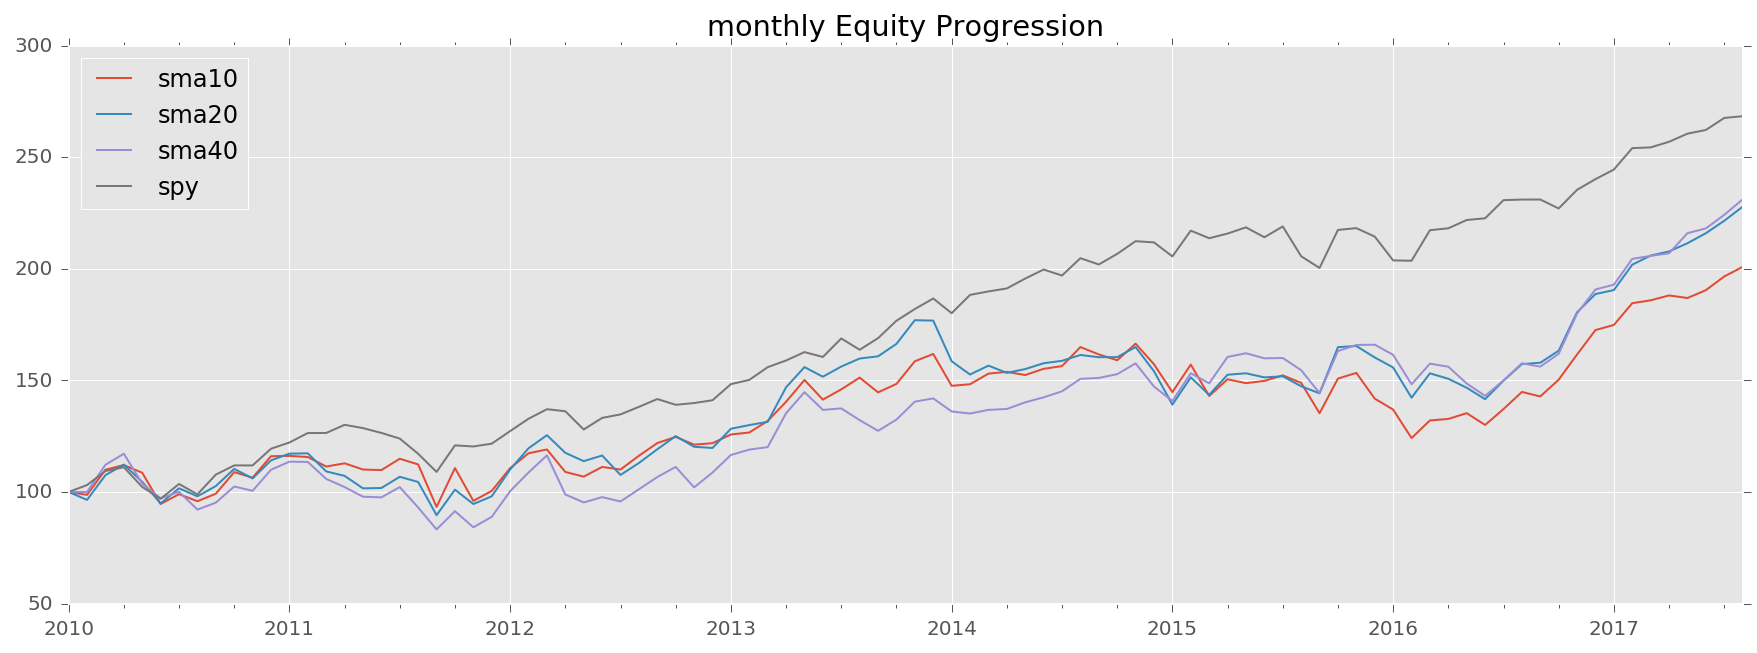

In [25]:
res2.plot(freq='m')

In [26]:
res2.display()

Stat                 sma10       sma20       sma40       spy
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-03  2010-01-03  2010-01-03  2010-01-03
End                  2017-09-01  2017-09-01  2017-09-01  2017-09-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         88.41%      127.62%     130.90%     154.66%
Daily Sharpe         0.54        0.70        0.72        0.89
Daily Sortino        0.65        0.85        0.91        1.14
CAGR                 8.62%       11.33%      11.54%      12.98%
Max Drawdown         -26.87%     -26.94%     -32.56%     -18.60%
Calmar Ratio         0.32        0.42        0.35        0.70

MTD                  0.62%       -0.09%      -0.09%      0.14%
3m                   7.73%       7.29%       6.38%       2.34%
6m                   7.30%       10.65%      10.64%      4.32%
YTD                  17.13%      20.63%      21.05%      11.90%
1Y                   40.51%      45.6

*******

SMA Crossover Strategy


*******

Basically, when the 50 day moving average will be above the 200-day moving average, we will be long (+1 target weight). Conversely, when the 50 is below the 200, we will be short (-1 target weight).

In [27]:
class WeighTarget(bt.Algo):
    """
    Sets target weights based on a target weight DataFrame.

    Args:
        * target_weights (DataFrame): DataFrame containing the target weights

    Sets:
        * weights

    """

    def __init__(self, target_weights):
        self.tw = target_weights

    def __call__(self, target):
        # get target weights on date target.now
        if target.now in self.tw.index:
            w = self.tw.ix[target.now]

            # save in temp - this will be used by the weighing algo
            # also dropping any na's just in case they pop up
            target.temp['weights'] = w.dropna()

        # return True because we want to keep on moving down the stack
        return True


In [28]:
## download some data & calc SMAs
data = bt.get('spy', start='2010-01-01')
sma50 = data.rolling(50).mean()
sma200 = data.rolling(200).mean()

## now we need to calculate our target weight DataFrame
# first we will copy the sma200 DataFrame since our weights will have the same strucutre
tw = sma200.copy()
# set appropriate target weights
tw[sma50 > sma200] = 1.0
tw[sma50 <= sma200] = -1.0
# here we will set the weight to 0 - this is because the sma200 needs 200 data points before
# calculating its first point. Therefore, it will start with a bunch of nulls (NaNs).
tw[sma200.isnull()] = 0.0

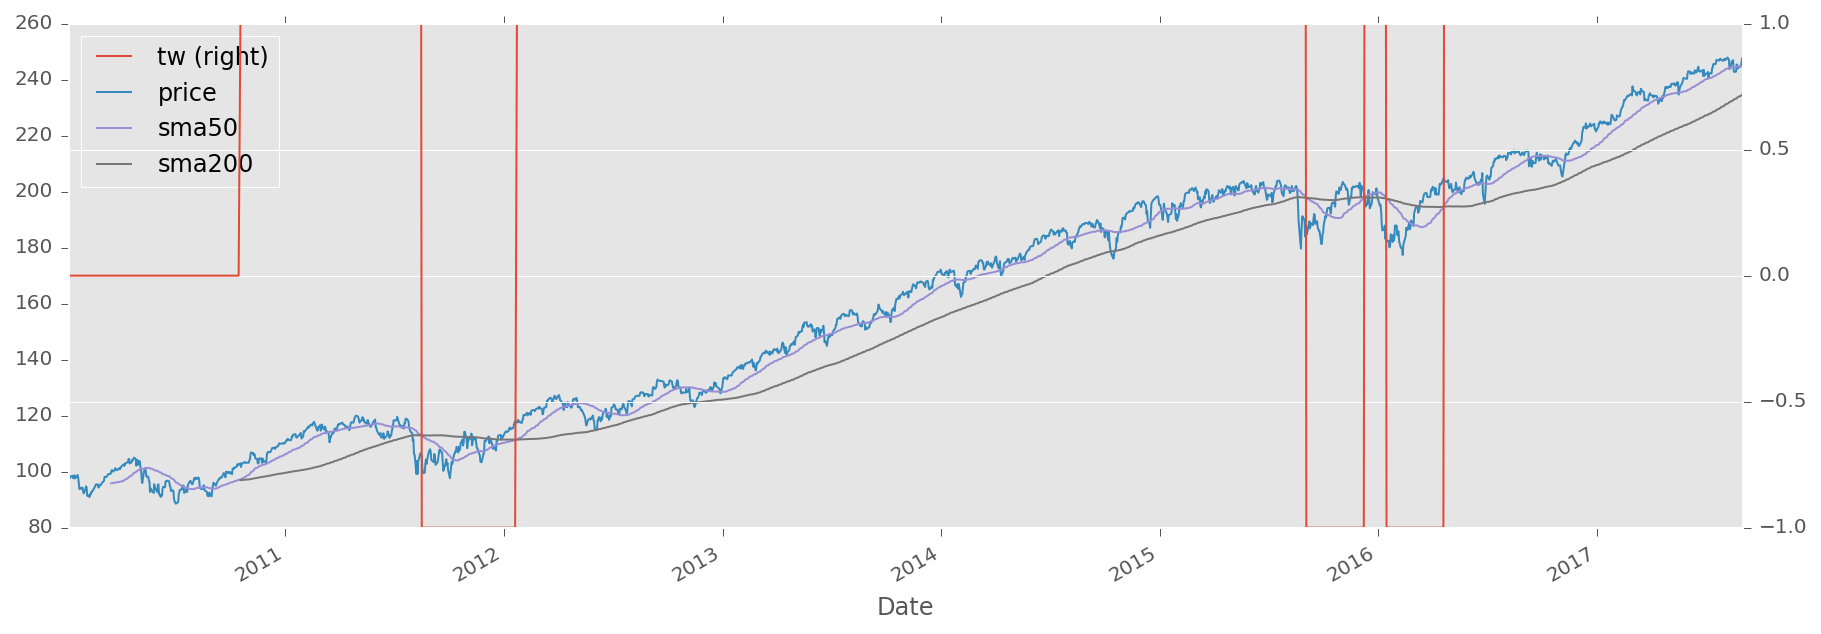

In [29]:
# plot the target weights + chart of price & SMAs
tmp = bt.merge(tw, data, sma50, sma200)
tmp.columns = ['tw', 'price', 'sma50', 'sma200']
ax = tmp.plot(figsize=(15,5), secondary_y=['tw'])

In [30]:
ma_cross = bt.Strategy('ma_cross', [WeighTarget(tw),
                                    bt.algos.Rebalance()])

t = bt.Backtest(ma_cross, data)
res = bt.run(t)

ma_cross
0% [####                          ] 100% | ETA: 00:00:01

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0% [############################# ] 100% | ETA: 00:00:00

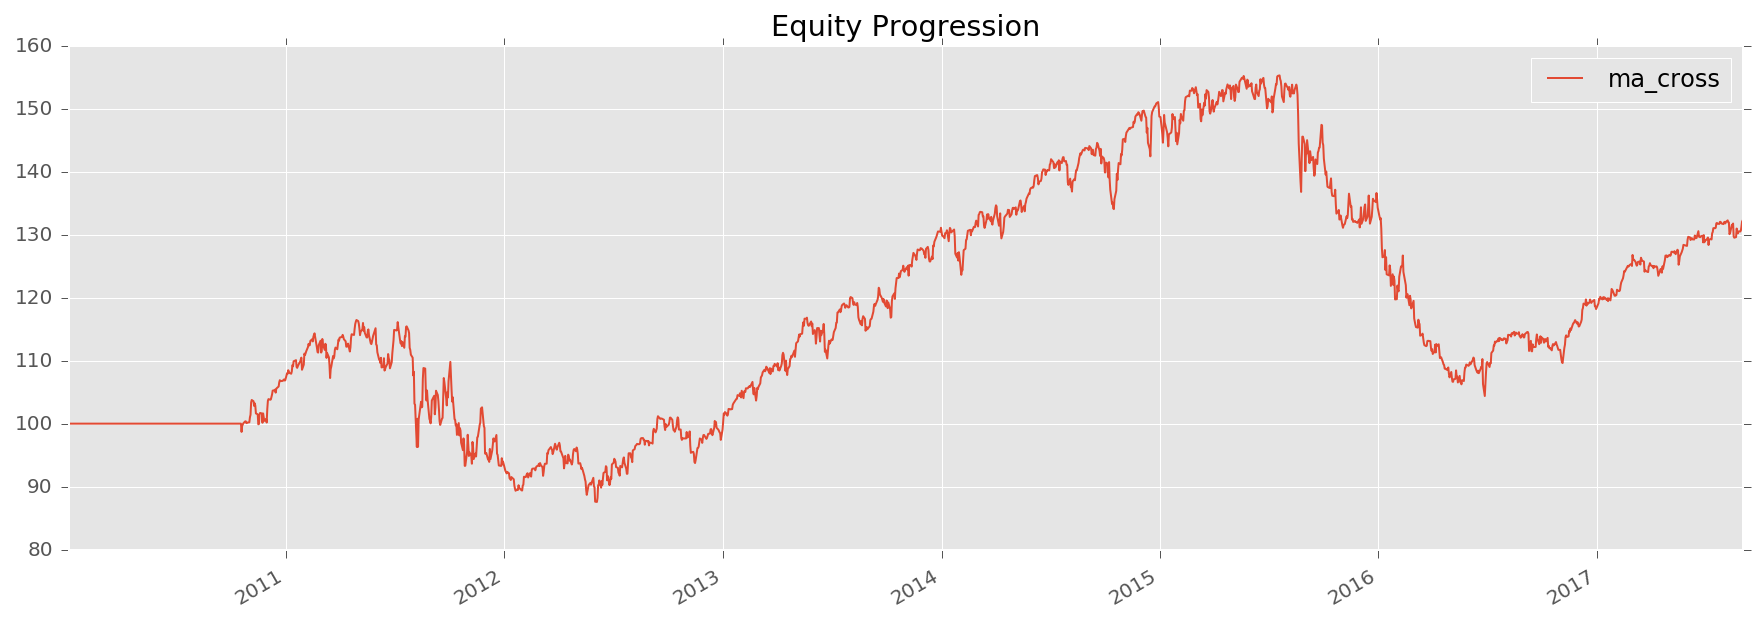

In [31]:
res.plot()